In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
import bibtexparser
import bs4
import requests
import re
import sys
import os
import ast

# Define the project directory relative to the notebook
notebook_dir = os.getcwd()  # Current working directory (notebooks folder)
project_dir = os.path.abspath(os.path.join(notebook_dir, "..", "src"))  # Path to src folder
# Add the src directory to the sys.path
sys.path.append(project_dir)

from lit_review_utils import *
from knowledge_graph_utils import *

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17648\3545083979.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
tabular_lit_review = pd.read_csv("../data/lite_review_graph.csv", sep=";")
tabular_lit_review.head()

,NodeID,Arxiv_id,Reviewed,Nick,Cites
0,"""0001""","""2408.08921""",1,GraphRAG survey,"[""2405.16506""]"
1,"""0002""","""2405.16506""",0,NaN,NaN


In [3]:
def get_cites_dict(df):
    """
    Construye un diccionario donde las claves son 'Arxiv_id' y los valores
    son listas de 'Cites' obtenidas desde el DataFrame.

    Args:
        df (pd.DataFrame): DataFrame con columnas 'Arxiv_id' y 'Cites'.

    Returns:
        dict: Diccionario con 'Arxiv_id' como claves y listas de 'Cites' como valores.
    """
    if 'Arxiv_id' not in df.columns or 'Cites' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'Arxiv_id' y 'Cites'.")

    # Convertir la columna "Cites" a listas reales
    df['Arxiv_id'] = df['Arxiv_id'].str.strip('"') 
    cites_dict = df.set_index('Arxiv_id')['Cites'].apply(
        lambda x: ast.literal_eval(x) if pd.notna(x) and x.strip() else []
    ).to_dict()

    return cites_dict


In [4]:
cites_dict = get_cites_dict(tabular_lit_review)

In [5]:
arxiv_id = "2408.08921"

# Get BibTeX string for a given arXiv ID
bibtex_string = get_arxiv_bibtex(arxiv_id)
print(f"BibTeX Citation:\n{bibtex_string}\n")

# Get publication year from the BibTeX string
publication_year = get_bibtex_year(bibtex_string)
print(f"Publication Year:\n{publication_year}\n")

# Get author list from the BibTeX string
author_list = get_bibtex_author(bibtex_string)
print(f"Author List:\n{author_list}\n")

# Get publication title from the BibTeX string
publication_title = get_bibtex_title(bibtex_string)
print(f"Publication Title:\n{publication_title}\n")

# Get abstract from the arXiv page
abstract = get_arxiv_abstract(arxiv_id)
print(f"Abstract:\n{abstract}\n")

BibTeX Citation:
@misc{peng2024graphretrievalaugmentedgenerationsurvey,
      title={Graph Retrieval-Augmented Generation: A Survey}, 
      author={Boci Peng and Yun Zhu and Yongchao Liu and Xiaohe Bo and Haizhou Shi and Chuntao Hong and Yan Zhang and Siliang Tang},
      year={2024},
      eprint={2408.08921},
      archivePrefix={arXiv},
      primaryClass={cs.AI},
      url={https://arxiv.org/abs/2408.08921}, 
}

Publication Year:
2024

Author List:
['Boci Peng', 'Yun Zhu', 'Yongchao Liu', 'Xiaohe Bo', 'Haizhou Shi', 'Chuntao Hong', 'Yan Zhang', 'Siliang Tang']

Publication Title:
Graph Retrieval-Augmented Generation: A Survey

Abstract:
Recently, Retrieval-Augmented Generation (RAG) has achieved remarkable success in addressing the challenges of Large Language Models (LLMs) without necessitating retraining. By referencing an external knowledge base, RAG refines LLM outputs, effectively mitigating issues such as ``hallucination'', lack of domain-specific knowledge, and outdated inf

Processing arXiv ID: 2408.08921
Processing arXiv ID: 2405.16506
Knowledge graph built and saved as 'knowledge_graph.gml'.


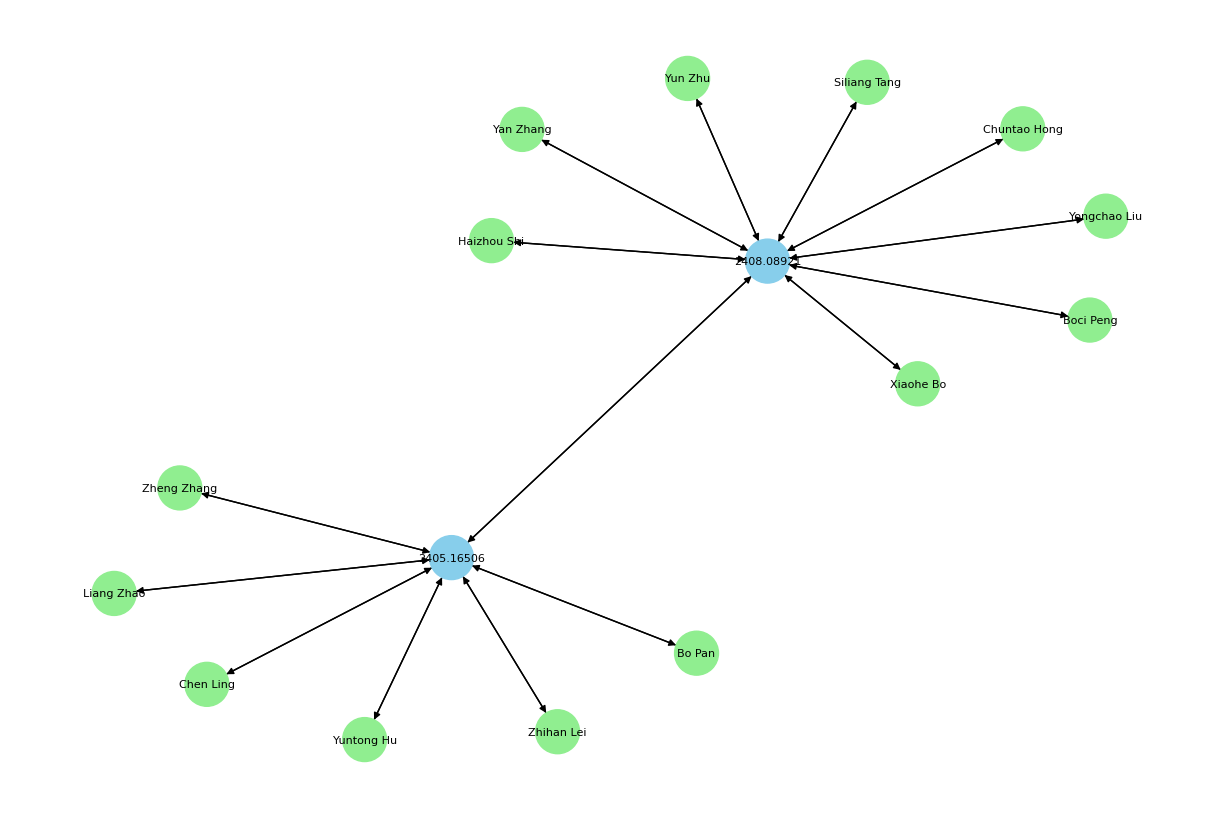

In [6]:
# Example list of arXiv IDs
arxiv_ids = ["2408.08921", "2405.16506"]  # Add more IDs as needed

# Build the graph
knowledge_graph = build_knowledge_graph(arxiv_ids, cites_dict)

# Save the graph for future analysis
nx.write_gml(knowledge_graph, "knowledge_graph.gml")
print("Knowledge graph built and saved as 'knowledge_graph.gml'.")

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(knowledge_graph)
node_colors = ["skyblue" if data['type'] == "paper" else "lightgreen" for _, data in knowledge_graph.nodes(data=True)]
nx.draw(knowledge_graph, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=8)
plt.show()


In [7]:
## Serialize to JSON
# data = nx.node_link_data(G)  # Converts the graph to a JSON-compatible format
# with open("graph.json", "w") as f:
#     json.dump(data, f)

## Load the graph from JSON
# with open("graph.json", "r") as f:
#     loaded_data = json.load(f)
# G_loaded = nx.node_link_graph(loaded_data)

In [8]:
# Problema de instalación de plotly... a resolver en otro momento... pero vaya, las visulizaciones interactivas son posibles!

#import networkx as nx
#import plotly.graph_objects as go
#
#def plot_interactive_graph(G):
#    # Layout for the graph
#    pos = nx.spring_layout(G)  # Compute layout positions
#    
#    # Create edges
#    edge_x = []
#    edge_y = []
#    for edge in G.edges():
#        x0, y0 = pos[edge[0]]
#        x1, y1 = pos[edge[1]]
#        edge_x.extend([x0, x1, None])
#        edge_y.extend([y0, y1, None])
#
#    edge_trace = go.Scatter(
#        x=edge_x, y=edge_y,
#        line=dict(width=1, color='gray'),
#        hoverinfo='none',
#        mode='lines')
#
#    # Create nodes
#    node_x = []
#    node_y = []
#    node_text = []
#    for node, data in G.nodes(data=True):
#        x, y = pos[node]
#        node_x.append(x)
#        node_y.append(y)
#        node_text.append(f"{node} ({data.get('type', 'unknown')})")
#
#    node_trace = go.Scatter(
#        x=node_x, y=node_y,
#        mode='markers+text',
#        hoverinfo='text',
#        text=node_text,
#        marker=dict(
#            size=10,
#            color='skyblue',
#            line_width=2))
#
#    # Combine into a figure
#    fig = go.Figure(data=[edge_trace, node_trace],
#                    layout=go.Layout(
#                        title='Interactive Knowledge Graph',
#                        showlegend=False,
#                        hovermode='closest',
#                        margin=dict(b=0, l=0, r=0, t=0),
#                        xaxis=dict(showgrid=False, zeroline=False),
#                        yaxis=dict(showgrid=False, zeroline=False))
#                    )
#    fig.show()
#
## Plot the graph
#plot_interactive_graph(knowledge_graph)
